### Import libraries 

In [48]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

## Load data from final csv

In [49]:
train = pd.read_csv("final_loan_train.csv")

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LoanAmountTerm          614 non-null    float64
 1   CreditHistory           614 non-null    float64
 2   LoanStatus              614 non-null    int64  
 3   LoanAmountLog           614 non-null    float64
 4   IncomeLog               614 non-null    float64
 5   Gender_Female           614 non-null    int64  
 6   Gender_Male             614 non-null    int64  
 7   Married_No              614 non-null    int64  
 8   Married_Yes             614 non-null    int64  
 9   Dependents_0            614 non-null    int64  
 10  Dependents_1            614 non-null    int64  
 11  Dependents_2            614 non-null    int64  
 12  Dependents_3            614 non-null    int64  
 13  Education_Graduate      614 non-null    int64  
 14  Education_Not Graduate  614 non-null    in

In [51]:
train.columns

Index(['LoanAmountTerm', 'CreditHistory', 'LoanStatus', 'LoanAmountLog',
       'IncomeLog', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_Graduate', 'Education_Not Graduate',
       'SelfEmployed_No', 'SelfEmployed_Yes', 'PropertyArea_Rural',
       'PropertyArea_Semiurban', 'PropertyArea_Urban'],
      dtype='object')

In [52]:
y = train.LoanStatus
X = train.drop('LoanStatus',axis=1)

In [53]:
y.shape, X.shape

((614,), (614, 19))

## Logistic Regression

In [54]:
# Importing packages logistic regression and evaluation 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### Split data into train and test data 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [56]:
# logistic regression   
model = LogisticRegression(random_state=1, max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Check model's performance with train data 
model.score(X_train,y_train)

0.8044806517311609

In [58]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score :',score)   

Accuracy_score : 0.8292682926829268


In [59]:
model.intercept_, model.coef_

(array([-0.1430396]),
 array([[-1.24217937e-03,  3.26873346e+00, -3.54980723e-01,
          6.15679371e-02, -2.77701515e-02, -1.00819059e-01,
         -2.49947644e-01,  1.21358433e-01, -1.13963948e-01,
         -3.23863658e-01,  8.91251127e-02,  2.20113282e-01,
          1.40044596e-01, -2.68633807e-01, -1.10919028e-01,
         -1.76701828e-02, -3.69089953e-01,  3.55764110e-01,
         -1.15263368e-01]]))

In [60]:
y_pred_prob = model.predict_proba(X_test)

### Display confusion matrix

In [61]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 19],
       [ 2, 88]], dtype=int64)

(0, 2)

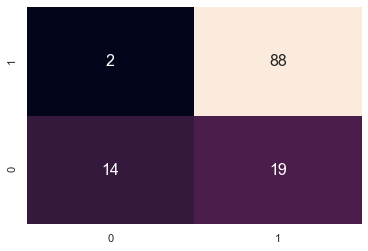

In [62]:
ax  = sns.heatmap(cm, annot=True, annot_kws={'size':16},cbar= False)
ax.set_ylim((0,2))

In [63]:
print('Accuracy :', (14 + 88) / (14 + 88 + 2 + 19))

Accuracy : 0.8292682926829268


In [64]:
print('Sensitivity', 88 / (88 + 2))

Sensitivity 0.9777777777777777


In [65]:
print("Positive Precision :", 88 / (88 + 19))

Positive Precision : 0.822429906542056


In [66]:
print('Specificity', 14 / (14 + 19))

Specificity 0.42424242424242425


In [67]:
print("Negative Precision :", 14 / (14 + 2))

Negative Precision : 0.875


### Display classification report

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
model.score(X_train,y_train)

1.0

In [72]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7073170731707317


In [73]:
confusion_matrix(y_test, y_pred)

array([[22, 11],
       [25, 65]], dtype=int64)

In [74]:
precision_score(y_test,y_pred)

0.8552631578947368

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.67      0.55        33
           1       0.86      0.72      0.78        90

    accuracy                           0.71       123
   macro avg       0.66      0.69      0.67       123
weighted avg       0.75      0.71      0.72       123



In [76]:
model.feature_importances_

array([0.04132423, 0.2945244 , 0.155741  , 0.34708627, 0.00814976,
       0.01201425, 0.00859268, 0.00759611, 0.0147543 , 0.00232534,
       0.00744109, 0.01450828, 0.        , 0.0096114 , 0.00889695,
       0.01471282, 0.02271081, 0.01884868, 0.01116163])

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
model.score(X_train,y_train)

1.0

In [80]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7804878048780488


## KNN 

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [83]:
model.score(X_train,y_train)

0.7922606924643585

In [84]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)  

accuracy_score 0.7398373983739838


## Naive Bayes 

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [87]:
model.score(X_train,y_train)

0.8065173116089613

In [88]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.8292682926829268


## Support Vector Machines

In [89]:
from sklearn.svm import SVC

In [90]:
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
model.score(X_train,y_train)

0.6761710794297352

In [92]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7317073170731707
